In [1]:
from __future__ import division, print_function
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')
from sigr.evaluation import CrossValEvaluation, Exp
from sigr import Context
from sigr.data import Dataset
import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


intra_subject_eval = CrossValEvaluation(crossval_type='intra-subject', batch_size=1000)
inter_subject_eval = CrossValEvaluation(crossval_type='inter-subject', batch_size=1000)


def report_intra_subject(subset, version):
    windows = np.arange(1, 301)
    with Context(parallel=True):
        acc = intra_subject_eval.vote_accuracy_curves(
            [Exp(dataset=Dataset.from_name(subset),
                 Mod=dict(num_gesture=8 if subset in ('dba', 'dbb') else 12,
                          adabn=True,
                          num_adabn_epoch=10,
                          context=[mx.gpu(0)],
                          symbol_kargs=dict(dropout=0, num_semg_row=16, num_semg_col=8),
                          params='.cache/sigr-{}-intra-subject-%d-v{}/model-0028.params'.format(subset, version)))],
            folds=list(range(180 if subset == 'dba' else 100)),
            windows=windows)
    acc = acc.mean(axis=(0, 1))
    print(acc[0], acc[windows == 150][0], windows[np.where(acc > 0.99)[0][0]] if acc[-1] > 0.99 else 0)
    plt.plot(windows[windows <= 150], 100 * acc[windows <= 150])
    plt.xlabel('Voting window (ms)')
    plt.ylabel('Accuracy (%)')
    plt.xlim(1, 150)
    plt.ylim(82, 100)
    plt.xticks([1, 30, 60, 90, 120, 150])
    plt.show()
    
    
def report_inter_subject(subset, version):
    windows = np.arange(1, 301)
    with Context(parallel=True):
        acc = inter_subject_eval.vote_accuracy_curves(
            [Exp(dataset=Dataset.from_name(subset),
                 Mod=dict(num_gesture=8 if subset in ('dba', 'dbb') else 12,
                          adabn=True,
                          num_adabn_epoch=10,
                          context=[mx.gpu(0)],
                          symbol_kargs=dict(dropout=0, num_semg_row=16, num_semg_col=8, num_filter=64),
                          params='.cache/sigr-{}-inter-subject-%d-v{}/model-0028.params'.format(subset, version)))],
            folds=list(range(18 if subset == 'dba' else 10)),
            windows=windows)
    acc = acc.mean(axis=(0, 1))
    print(acc[0], acc[windows == 150][0])
    plt.plot(windows[windows <= 150], 100 * acc[windows <= 150])
    plt.xlabel('Voting window (ms)')
    plt.ylabel('Accuracy (%)')
    plt.xlim(1, 150)
    plt.xticks([1, 30, 60, 90, 120, 150])
    plt.show()

0.888647916667 0.993528854942 54


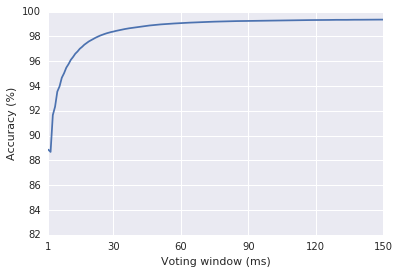

0.8649425 0.989835487662 154


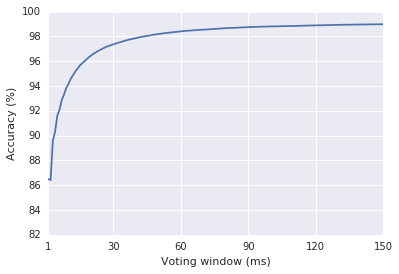

0.837299166667 0.993240305523 75


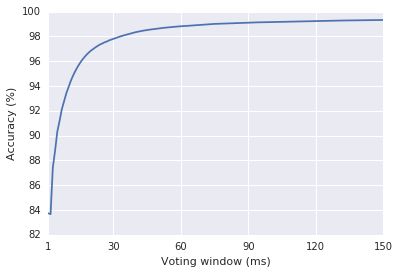

In [63]:
report_intra_subject('dba', '957.49')
report_intra_subject('dbb', '957.42.1')
report_intra_subject('dbc', '957.45')

0.286533333333 0.454267854811


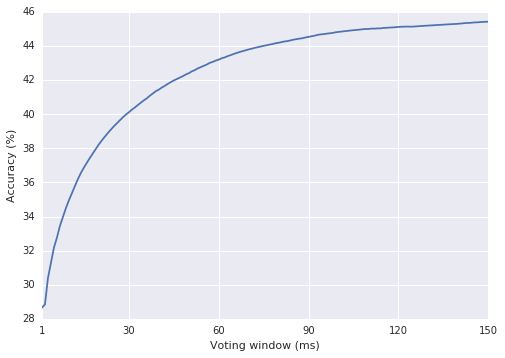

0.350895 0.554032021152


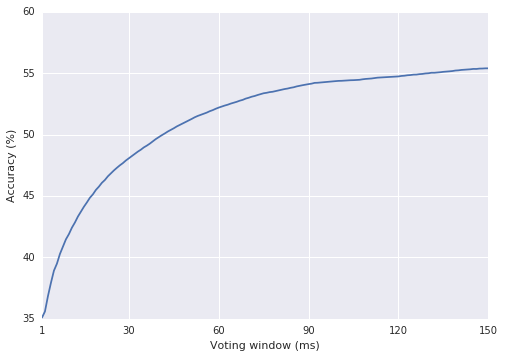

0.2131225 0.352511750881


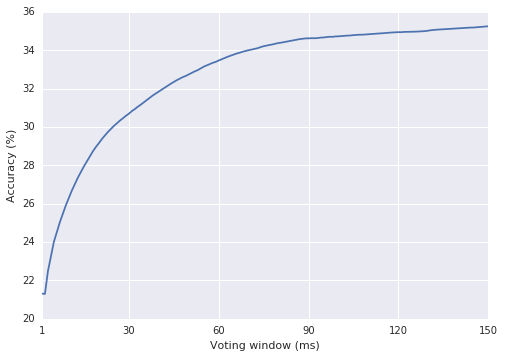

In [2]:
# 16 filters
#report_inter_subject('dba', '957.46')
#report_inter_subject('dbb', '957.40')
#report_inter_subject('dbc', '957.39')
# 64 filters
report_inter_subject('dba', '958.6')
report_inter_subject('dbb', '958.7')
report_inter_subject('dbc', '958.8')